In [1]:
!pip install -U pyTigerGraph

In [2]:
# Imports
import pyTigerGraph as tg
import json
import pandas as pd

# Connection parameters
hostName = "https://tg-sample.i.tgcloud.io/"
userName = "tigergraph"
password = "tigergraph"

conn = tg.TigerGraphConnection(host=hostName, username=userName, password=password)

print("Connected")

Connected


In [4]:
conn.graphname="MyGraph"
secret = conn.createSecret()
authToken = conn.getToken(secret)
authToken = authToken[0]
print(authToken)
# authToken = 'rc7reopbis1667ksgcppq5v5fb99p6s1'
conn = tg.TigerGraphConnection(host=hostName, graphname="MyGraph", username=userName, password=password, apiToken=authToken)

def pprint(string):
  print(json.dumps(string, indent=2))

rpuea9ecfnnb5gfevf3a05cj1rlhn1ta


In [5]:
users = conn.getVertexDataframe("User")
jobs = conn.getVertexDataframe("Jobs")
work_profile=conn.getVertexDataframe("Work_profile")
courses=conn.getVertexDataframe("Courses")

In [11]:
courses.drop(['v_id'],axis=1,inplace=True)
users.drop(['v_id'],axis=1,inplace=True)
work_profile.drop(['v_id'],axis=1,inplace=True)
jobs.drop(['v_id'],axis=1,inplace=True)

In [19]:
full_profile=pd.concat([users,work_profile[['work_experience','skill_1','skill_2']]],axis=1)

# Data insights 

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

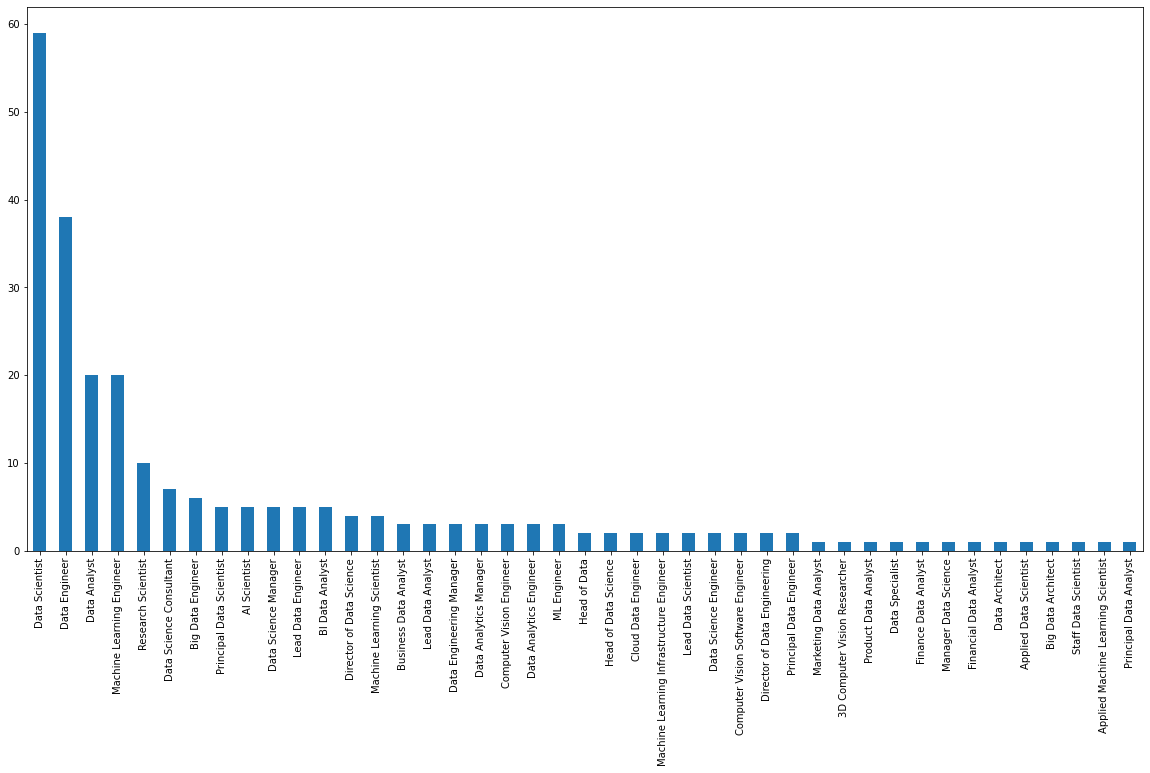

<Figure size 432x288 with 0 Axes>

In [136]:
figure=(20,20)
jobs['title'].value_counts().plot(kind='bar',figsize=(20,10))
plt.figure()

<BarContainer object of 5 artists>

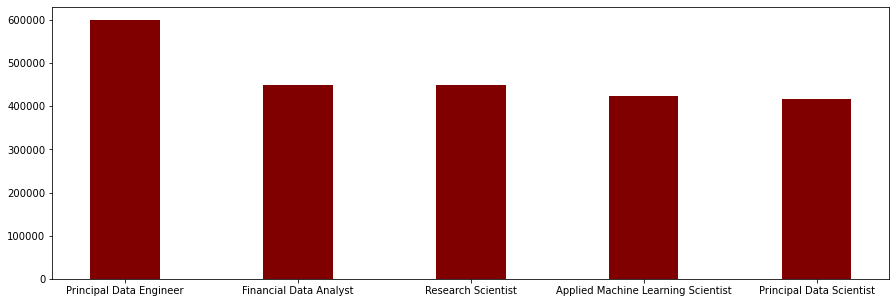

In [148]:
sorted_df = jobs.sort_values(by='Salary_in_USD', ascending=False)
sorted_df=pd.DataFrame(sorted_df)
sorted_df.head(5)
fig = plt.figure(figsize = (15, 5)) 
# creating the bar plot
plt.bar(sorted_df['title'].head(5),sorted_df['Salary_in_USD'].head(5), color ='maroon',
        width = 0.4)

In [155]:
##skills in demand
jobs['skill_required_1'].value_counts().head(5)

Data Science        120
Machine Learning     29
Statistics           22
Executive            15
Research             10
Name: skill_required_1, dtype: int64

# Custom functions

In [126]:
def jobs_in_my_location(user_id):
    location=full_profile[full_profile['id']==user_id]['Location']
    location=location.iloc[0]
    print("Here are some great jobs in\n"+location+"\n")
    df=jobs[jobs['Location']==location]
    return(df)

In [244]:
jobs_in_my_location(2906) ##try 3, 2906 for eg. to get non-empty returns

Here are some great jobs in
Canada



,job_id,exp_required,title,Salary_in_USD,Location,skill_required_1,skill_required_2
2,13,3,Data Scientist,75966,Canada,Data Science,Data Analytics
15,55,3,Research Scientist,187917,Canada,Research,science and numerics
28,10,7,Data Science Engineer,127543,Canada,Data Science,Data Analytics
69,94,3,Research Scientist,63971,Canada,Research,science and numerics
88,87,7,Big Data Architect,99956,Canada,DBMS,Hadoop-Apache
89,139,7,Research Scientist,96357,Canada,Research,science and numerics
94,131,7,Data Analyst,71968,Canada,Statistics,Data Analytics
184,90,7,Data Scientist,103954,Canada,Data Science,Data Analytics
221,204,7,Data Scientist,87961,Canada,Data Science,Data Analytics


In [196]:
def suggest_jobs(user_id):
    skill1=full_profile[full_profile['id']==user_id]['skill_1']
    skill1=skill1.iloc[0]
    skill2=full_profile[full_profile['id']==user_id]['skill_1']
    skill2=skill2.iloc[0]
    name=full_profile[full_profile['id']==user_id]['name']
    print("Hey "+name.iloc[0]+", Here are some suggested jobs according to your skillset")
    for i in jobs.index:
        if (jobs.iloc[i]['skill_required_1']==skill1):
            print(jobs.iloc[i])
            print("\n\n")

In [245]:
suggest_jobs(14) 

Hey DearMoonshine__, Here are some suggested jobs according to your skillset
job_id                                    28
exp_required                               3
title                Data Analytics Engineer
Salary_in_USD                         110000
Location            United States of America
skill_required_1                    Engineer
skill_required_2              Data Analytics
Name: 1, dtype: object



job_id                                   36
exp_required                              7
title               Data Analytics Engineer
Salary_in_USD                         79866
Location                            Germany
skill_required_1                   Engineer
skill_required_2             Data Analytics
Name: 214, dtype: object



job_id                                  147
exp_required                              7
title               Data Analytics Engineer
Salary_in_USD                         50000
Location                           Viet Nam
skill_required_1          

In [236]:
##meet people with similar interests
def meet_people(user_id):
    name=full_profile[full_profile['id']==user_id]['name']
    print("Hey "+name.iloc[0]+"! Here are some people you should get in touch with!\n")
    interest=full_profile[full_profile['id']==user_id]['interest'].iloc[0]
    for i in users.index:
            if (users.iloc[i]['interest']==interest):
                print(users.iloc[i][['name','email_ID']])
                print("\n")

In [237]:
meet_people(12)

Hey bethleia! Here are some people you should get in touch with!

name                  OriginalOffers
email_ID    OriginalOffers@gmail.com
Name: 50, dtype: object


name                  janreceptionist
email_ID    janreceptionist@gmail.com
Name: 157, dtype: object


name                  itskaiumaukele
email_ID    itskaiumaukele@gmail.com
Name: 164, dtype: object


name                  LaurenAmber1
email_ID    LaurenAmber1@gmail.com
Name: 631, dtype: object


name                  miiiiiica
email_ID    miiiiiica@gmail.com
Name: 726, dtype: object


name                  mariebbybee
email_ID    mariebbybee@gmail.com
Name: 771, dtype: object


name                  Aforextreme
email_ID    Aforextreme@gmail.com
Name: 867, dtype: object


name                  Mathilde_Clt
email_ID    Mathilde_Clt@gmail.com
Name: 908, dtype: object


name                  Elizabethans1
email_ID    Elizabethans1@gmail.com
Name: 937, dtype: object


name                  MinxCouture
email_ID    MinxCoutur

In [238]:
##check for work experience
def work_ex_eligibility(user_id):
    name=full_profile[full_profile['id']==user_id]['name']
    print("Hey "+name.iloc[0]+"! Here are some jobs you are eligible for according to your work experience!\n")
    work_ex=full_profile[full_profile['id']==user_id]['work_experience'].iloc[0]
    for i in jobs.index:
            if (jobs.iloc[i]['exp_required']==work_ex):
                print(jobs.iloc[i][['title']])
                print("\n")

In [246]:
work_ex_eligibility(2)

Hey monroevicious! Here are some jobs you are eligible for according to your work experience!

title    Director of Data Engineering
Name: 9, dtype: object


title    Machine Learning Engineer
Name: 11, dtype: object


title    Data Engineer
Name: 13, dtype: object


title    Marketing Data Analyst
Name: 24, dtype: object


title    Data Science Engineer
Name: 28, dtype: object


title    Data Engineering Manager
Name: 29, dtype: object


title    Machine Learning Scientist
Name: 35, dtype: object


title    Data Scientist
Name: 38, dtype: object


title    Data Analytics Manager
Name: 39, dtype: object


title    Big Data Engineer
Name: 40, dtype: object


title    Data Scientist
Name: 43, dtype: object


title    Data Analyst
Name: 50, dtype: object


title    Principal Data Engineer
Name: 55, dtype: object


title    Research Scientist
Name: 59, dtype: object


title    Data Engineer
Name: 60, dtype: object


title    Data Engineer
Name: 62, dtype: object


title    Manager Data Sci